In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

# 2.	Problem Definition and Data Collection## 
2.1	Defining the Proble
m
We aim to predict the median_house_value (target variable) of California districts using features such as:
•	Median income
•	Population
•	Average number of rooms per household
•	Proximity to the ocean, among others.
Problem Statement: Build a regression model that accurately predicts housing prices using the given fe
a# tures.
2.2	Data Source
We'll use the California Housing Prices dataset from the scikit-learn library. This dataset contains data on California housing from the 1990 census. It i
* Instances: **20640 rows**
* Features: 8 numerical and categorical features
al features
You can load this dataset dir*scikit-learn*scikit-learn.


In [3]:
# Load the dataset
import pandas as pd
import os

# Construct the full path to the CSV file
csv_path = os.path.join("/kaggle/input/california-housing-prices", "housing.csv")

try:
    # Read the CSV file into a Pandas DataFrame
    data = pd.read_csv(csv_path)

    # Display the first few rows to verify the data has been loaded
    print(data.head())

    # Display some information about the data
    print(data.info())

    # Display descriptive statistics
    print(data.describe())

except FileNotFoundError:
    print(f"Error: File not found at {csv_path}. Please ensure the path is correct.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {csv_path}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

## 2.4	Initial Data Exploration

In [4]:
# Example of what you might do next (if the file loaded successfully):
if 'housing' in locals(): #check if housing dataframe exists
    # Check for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Example of visualizing a column
    import matplotlib.pyplot as plt
    data['median_house_value'].hist()
    plt.show()

    # Example of visualizing relationships
    data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
    plt.show()

# Display the first few rows
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


# 3.	Data Cleaning, Feature Engineering, and Visualization
Data Cleaning, Feature Engineering, and Visualization are crucial steps in the data science process, typically performed after data collection and before model building. They prepare the data for effective analysis and modeling. Here's a breakdown of each:

## 3.1. Data Cleaning:

Data in the real world is rarely perfect. It often contains errors, inconsistencies, and missing values. Data cleaning aims to address these issues to improve data quality and ensure reliable analysis and modeling results. Common data cleaning tasks include:   

**Handling Missing Values:**
Identification: Identifying missing values (represented as NaN, None, empty strings, etc.).   
Imputation: Filling in missing values with estimated values (e.g., mean, median, mode, or more advanced methods).   
Removal: Removing rows or columns with excessive missing values (use with caution).   
Handling Duplicates: Identifying and removing duplicate records.   
Handling Outliers: Detecting and addressing extreme values that deviate significantly from the rest of the data. Methods include:
Removal: Removing outliers (use with caution).   
Transformation: Transforming the data to reduce the impact of outliers (e.g., log transformation).   
Capping/Flooring: Setting upper and lower bounds for extreme values.   
  
Data Type Conversion: Converting data to the appropriate data types (e.g., converting strings to numbers, dates to datetime objects).   
Handling Inconsistent Data: Addressing inconsistencies in data formatting, spelling, or units.   
Data Transformation: Transforming the data to a more suitable format for analysis or modeling. Examples include:
Normalization/Scaling: Scaling numerical features to a specific range (e.g., 0-1) or standardizing them (mean=0, standard deviation=1).   
Encoding Categorical Variables: Converting categorical variables (e.g., colors, categories) to numerical representations (e.g., one-hot encoding, label encoding).   
  
## 3.2. Feature Engineering:

Feature engineering involves creating new features from existing ones to improve model performance. It requires domain knowledge and creativity. Good features can significantly enhance a model's ability to capture underlying patterns in the data. Common feature engineering techniques include:   

**Creating New Features from Existing Ones:**
Combining features: Creating new features by combining existing ones through addition, subtraction, multiplication, division, or other mathematical operations. (e.g. creating total_rooms from bedrooms and rooms)   
Extracting features: Extracting specific parts of existing features, such as day of the week from a date, or parts of an address.
Creating Dummy Variables: Creating binary variables to represent categorical features (one-hot encoding).   
Creating Interaction Terms: Creating new features by combining two or more existing features.   
Transformations: Applying mathematical transformations to existing features, such as log transformation, square root transformation, or polynomial transformation.
Domain-Specific Features: Creating features based on domain knowledge of the data.   

## 3.3. Data Visualization:

Data visualization uses visual representations (charts, graphs, maps) to explore and understand data. It helps to:   

Identify Patterns and Trends: Visualizations can reveal patterns, trends, and relationships in the data that might not be apparent from looking at raw numbers.   
Detect Outliers: Visualizations like box plots and scatter plots can help identify outliers.   
Communicate Insights: Visualizations are a powerful way to communicate findings to others.   
Guide Feature Engineering: Visualizations can help you understand the relationships between features and the target variable, which can inform feature engineering decisions.   
Common data visualization techniques include:

Histograms: Show the distribution of a single numerical variable.
Box plots: Show the distribution of a numerical variable and identify outliers.   
Scatter plots: Show the relationship between two numerical variables.
Line charts: Show trends over time.
Bar charts: Compare values across different categories.   
Heatmaps: Show the correlation between multiple variables.
Relationship between the three:

These three steps are often intertwined. For example, visualizing data can reveal missing values or outliers, which then need to be cleaned. Similarly, understanding the data through visualization can inspire new features to be engineered.

# 3.1	Data Cleaning
## 3.1.2 Checking Null Values

In [5]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
"""
If missing values exist, handle them:
1.	Imputation: Replace missing values with the median.
2.	Dropping: Drop rows or columns with excessive missing values.
"""
# 1. Numerical Features: Imputation with Median
numerical_cols = data.select_dtypes(include=np.number).columns  # Select numerical columns
for col in numerical_cols:
  data[col].fillna(data[col].median(), inplace=True)
  
# 2. Categorical Features: Imputation with Mode
categorical_cols = data.select_dtypes(exclude=np.number).columns # Select categorical columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Impute with the mode

print("\nData after Imputation:")
print(data.isnull().sum())



Data after Imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## 3.1.2	Handling Duplicates
Check and remove duplicates:

In [7]:
print(data.duplicated().sum())  # Count duplicates
data.drop_duplicates(inplace=True)  # Remove duplicates


0


## 3.2	Feature Engineering

In [8]:
"""
3.2.1	Creating New Features
Add meaningful features to enhance model performance:
""" 
# Create a new feature: Rooms per household
data['rooms_per_household'] = data['total_rooms'] / data['households']

# Create another feature: Population per household
data['population_per_household'] = data['population'] / data['households']

data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467


In [9]:
"""
3.2.2	Encoding Categorical Features
If the dataset includes categorical features, encode them:
"""
from sklearn.preprocessing import OneHotEncoder

# Example: One-hot encoding for a categorical feature
encoder = OneHotEncoder(sparse=False)
encoded_feature = encoder.fit_transform(data[['ocean_proximity']])
encoded_feature

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [10]:
# 3.3	Data Visualization

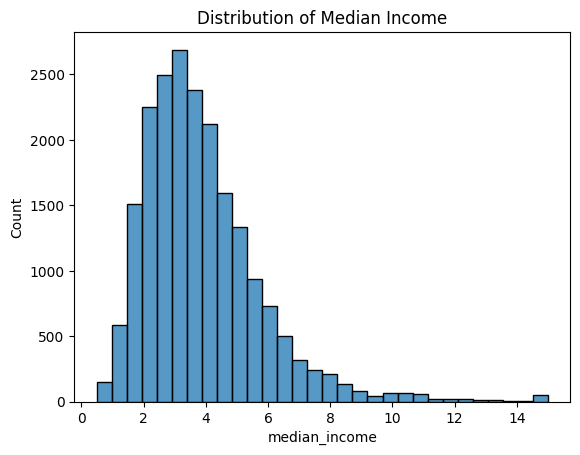

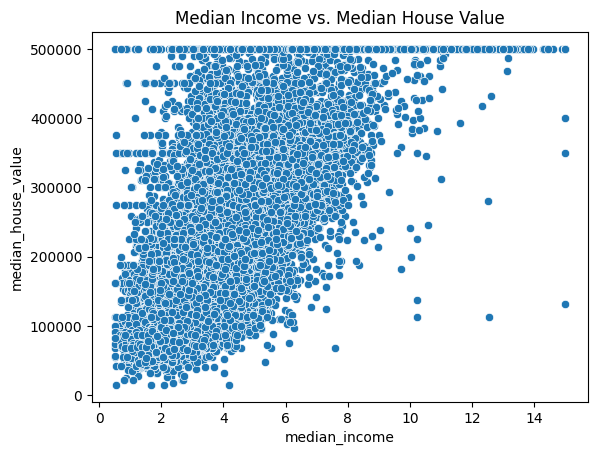

In [11]:
"""
3.3.1	Univariate Analysis
Visualize the distribution of numerical features:
"""
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for median_income
sns.histplot(data['median_income'], bins=30)
plt.title("Distribution of Median Income")
plt.show()

"""
3.3.2	Bivariate Analysis
Visualize relationships between features and the target variable:
"""
# Scatter plot for median_income vs. median_house_value
sns.scatterplot(x=data['median_income'], y=data['median_house_value'])
plt.title("Median Income vs. Median House Value")
plt.show()


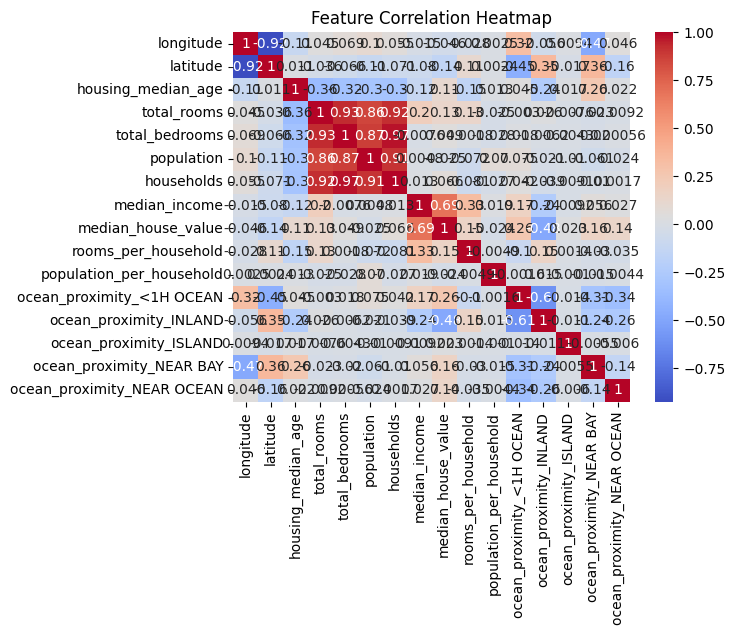

In [12]:
"""
3.3.3	Correlation Analysis
""" 

# Handle the categorical column (ocean_proximity)
# Option 1: One-Hot Encoding (recommended)
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'])  # One-Hot Encoding

# Option 2: Label Encoding (less recommended)
# data_encoded = data.copy()
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data_encoded['ocean_proximity_encoded'] = le.fit_transform(data['ocean_proximity'])  # Label Encoding

# Calculate the correlation matrix using the encoded DataFrame
correlation_matrix = data_encoded.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## 4.	Building and Evaluating a Regression Model

In [13]:
"""
4.1	Data Splitting
Split the data into training and testing sets:
"""
from sklearn.model_selection import train_test_split

X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
"""
4.2	Model Selection and Training
Use a simple regression model as the baseline:
"""
from sklearn.linear_model import LinearRegression

# Handle the categorical column (ocean_proximity)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # One-Hot Encoding with handle_unknown
X_train_encoded = encoder.fit_transform(X_train[['ocean_proximity']])
X_test_encoded = encoder.transform(X_test[['ocean_proximity']])

# Create DataFrame from the numpy array
X_train_encoded_df = pd.DataFrame(X_train_encoded, index=X_train.index, columns=encoder.get_feature_names_out(['ocean_proximity']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, index=X_test.index, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Combine encoded categorical features with other features
X_train = pd.concat([X_train.drop('ocean_proximity', axis=1), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop('ocean_proximity', axis=1), X_test_encoded_df], axis=1)

# Impute missing values (important to do AFTER splitting and encoding)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns, index = X_test.index)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nEncoded X_train:")
print(X_train)
print("\nEncoded X_test:")
print(X_test)



Encoded X_train:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  me

In [15]:
"""
4.3	Model Evaluation
Evaluate the model using metrics:
"""
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")



MSE: 4876289064.984584, MAE: 50549.77066010137, R2: 0.6278803681938641


In [16]:
"""
4.4	Hyperparameter Tuning (Optional)
Use GridSearchCV for hyperparameter optimization:

"""
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': None, 'n_estimators': 200}


In [17]:
# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")

MSE: 2482648590.817032, MAE: 31965.921954941863, R2: 0.8105439880189349
